## Importing needed packages

In [1]:
import csv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation
import numpy as np
import os
import open3d as o3d
#IMPORT MODULES
from context import geomapi 
from geomapi.nodes import *
import json


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Plotting the position and orientation

In [2]:
def plot_camera_positions(cameras, orientation  = False,x = True, y = True, z= False, length = 1, title = None):
    fig = plt.figure()
    
    if x and y and z:
        ax = fig.add_subplot(111, projection='3d')
        
    else:
        _, ax = plt.subplots()
        ax.axis('equal')

    l = len(cameras)
    if x:
        pos_xs = np.zeros(l)
    if y:
        pos_ys = np.zeros(l)
    if z:
        pos_zs = np.zeros(l)

    for i, cam in enumerate(cameras):
        if x:
            pos_xs[i] = cam.pos_x
        if y:
            pos_ys[i] = cam.pos_y
        if z:
            pos_zs[i] = cam.pos_z
   
        if orientation:

            direction = np.array([length,0.0,0.0])
            start_point = np.array([float(cam.pos_x), float(cam.pos_y), float(cam.pos_z)])
            
            if cam.orientation.shape == np.array([4,]):
                R = Rotation.from_quat(cam.orientation).as_matrix()
            elif cam.orientation.shape == np.array([3,3]):
                R = cam.orientation            
            
            # print(R)
            end_point = np.dot(direction,R) + start_point


            if x and y and z:
                ax.plot([start_point[0], end_point[0]],[start_point[1],end_point[1]],[start_point[2],end_point[2]])
            elif x and y: 
                ax.plot([start_point[0], end_point[0]],[start_point[1],end_point[1]])
            elif x and z:
                ax.plot([start_point[0], end_point[0]],[start_point[2],end_point[2]])
            elif y and z:
                ax.plot([start_point[1], end_point[1]],[start_point[2],end_point[2]])



    if x and y and z:
        if title:
            plt.title('XYZ - ' + title)
        else:
            plt.title('XYZ')
        ax.scatter(pos_xs, pos_ys, pos_zs)
    elif x and y:
        if title:
            plt.title('XY - ' + title)
        else:
            plt.title('XY')
        plt.scatter(pos_xs, pos_ys)
    elif x and z:
        if title:
            plt.title('XZ - ' + title)
        else:
            plt.title('XZ')
        plt.scatter(pos_xs, pos_zs)
    elif y and z:
        if title:
            plt.title('YZ - ' + title)
        else:
            plt.title('YZ')
        plt.scatter(pos_ys, pos_zs)

    plt.show()


In [3]:
Kal = []
cam_head_model = ImageNode()

cam_head_model.pos_x = 0
cam_head_model.pos_y = 0
cam_head_model.pos_z = 0
cam_head_model.orientation = np.array([0, 0, 0 ,1])
Kal.append(cam_head_model)

cam0_model = ImageNode()

cam0_model.pos_x = 0.0015357506106269264
cam0_model.pos_y = 0.11339708124682546
cam0_model.pos_z = 0.0018176080608079195
cam0_model.orientation = np.array([-0.43566974293767546, -0.42952854099786708, -0.56303167513739893, 0.55560097223532456]) 
Kal.append(cam0_model)
print(cam0_model.orientation/0.55560097223532456)
print(Rotation.from_quat(cam0_model.orientation).as_euler('xyz', degrees=True))

cam1_model = ImageNode()

cam1_model.pos_x = 0.11250452918585144
cam1_model.pos_y = -0.00021724002701028523
cam1_model.pos_z = 0.0010719139085472
cam1_model.orientation = np.array([0, -0.60876141981435583, 0,0.79335334734631935]) 
Kal.append(cam1_model)
print(cam1_model.orientation/0.79335334734631935)
print(Rotation.from_quat(cam1_model.orientation).as_euler('xyz', degrees=True))

cam2_model = ImageNode()

cam2_model.pos_x = 0.00014796500811924129
cam2_model.pos_y = -0.11356779431087526
cam2_model.pos_z = -0.00059219062508247475
cam2_model.orientation = np.array([0.4318979698852744, 0.43289517297104146, -0.55943593181970508,0.55955102628479647]) 
Kal.append(cam2_model)
print(cam2_model.orientation/0.55955102628479647)
print(Rotation.from_quat(cam2_model.orientation).as_euler('xyz', degrees=True))

cam3_model = ImageNode()

cam3_model.pos_x = -0.11418824480459763
cam3_model.pos_y = 0.00038795309106007118
cam3_model.pos_z = -0.00066148408954553109
cam3_model.orientation = np.array([-0.61137763235629028, -0.0041506355204041128, 0.79132587820439926,0.0018754634707168728]) 
Kal.append(cam3_model)
print(cam3_model.orientation/0.0018754634707168728)
print(Rotation.from_quat(cam3_model.orientation).as_euler('xyz', degrees=True))

[-0.78414143 -0.77308817 -1.01337417  1.        ]
[ -0.10044476 -75.43994714 -90.68349375]
[ 0.         -0.76732697  0.          1.        ]
[  0.         -74.99999867   0.        ]
[ 0.77186521  0.77364736 -0.99979431  1.        ]
[ -0.23095371  75.39618014 -90.16670269]
[-325.98749157   -2.21312523  421.93617234    1.        ]
[ -2.01093494  75.37119333 178.17493134]


In [4]:
# alfa = 30 #Rotatie rond z as (yaw)
# beta = 0 #rotatie rond y as (beta)
# gamma = 0 #rotatie rond x as (roll)

# def to_quaternion(alfa, beta, gamma):
#     r00 = np.cos(alfa) * np.cos(beta)
#     r01 = np.cos(alfa) * np.sin(beta) * np.sin(gamma) - np.sin(alfa) * np.cos(gamma)
#     r02 = np.cos(alfa) * np.sin(beta) * np.cos(gamma) + np.sin(alfa) * np.sin(gamma)
    

#     r10 = np.sin(alfa) * np.cos(beta)
#     r11 = np.sin(alfa) * np.sin(beta) * np.sin(gamma) + np.cos(alfa) * np.cos(gamma)
#     r12 = np.sin(alfa) * np.sin(beta) * np.cos(gamma) - np.cos(alfa) * np.sin(gamma)

#     r20 = - np.sin(beta)
#     r21 = np.cos(beta) * np.sin(gamma)
#     r22 = np.cos(beta) * np.cos(gamma)

#     R = np.array([
#         [r00,r01,r02],
#         [r10,r11,r12],
#         [r20,r21,r22]
#     ])
#     # print(R)

#     orientation = np.asarray(Rotation.from_matrix(R).as_quat())

#     return orientation

In [5]:
# import math
# Kal = []
# alfa = 6*np.pi/4
# gamma = 0#np.pi/2
# beta = 0

# # while alfa < 2*np.pi:
    
#     # while beta < 2*np.pi:
# qx, qy, qz ,qw= to_quaternion(alfa, beta, gamma)
# print(np.array([qx, qy, qz ,qw]))
# cam_head_model = ImageNode()

# cam_head_model.pos_x = 0
# cam_head_model.pos_y = 0
# cam_head_model.pos_z = 0
# cam_head_model.orientation = np.array([qz, qy, qx ,qw])
# Kal.append(cam_head_model)

# title = str(math.degrees(alfa)) + ' - ' + str(math.degrees(beta)) + ' - ' + str(math.degrees(gamma))
# # plot_camera_positions(Kal, orientation = True, x = True, y=True, z=True, title = title, length= 1 )

# plot_camera_positions(Kal, orientation = True, x = True, y=True, z=False, length=1, title = title)
# # plot_camera_positions(Kal, orientation = True, x = True, y=False, z=True, length=1, title = title)
# # plot_camera_positions(Kal, orientation = True, x = False, y=True, z=True, length=1, title = title)
    
# #     # beta += np.pi/2
# #     # alfa += np.pi/4

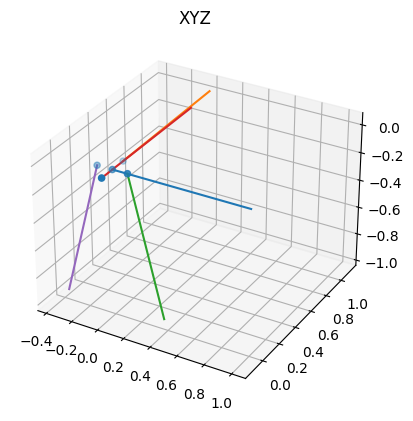

<Figure size 640x480 with 0 Axes>

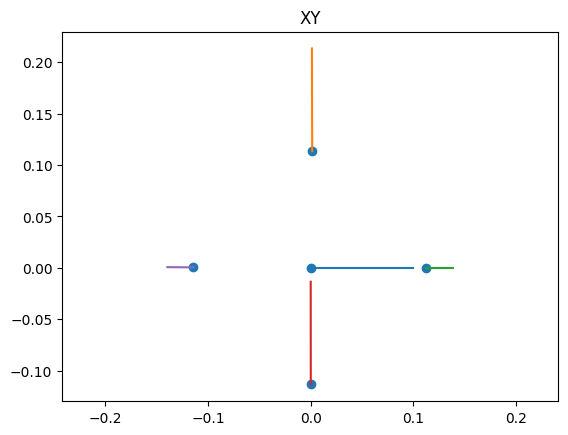

<Figure size 640x480 with 0 Axes>

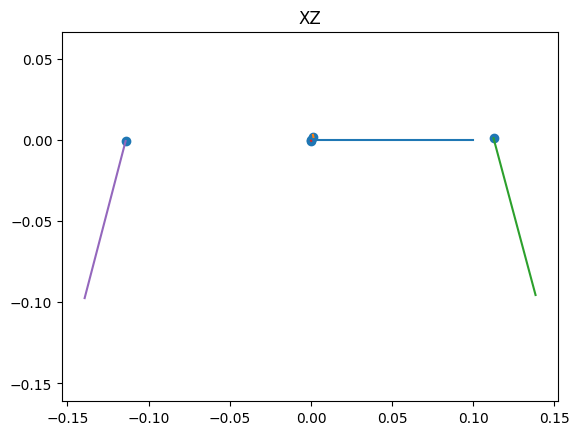

<Figure size 640x480 with 0 Axes>

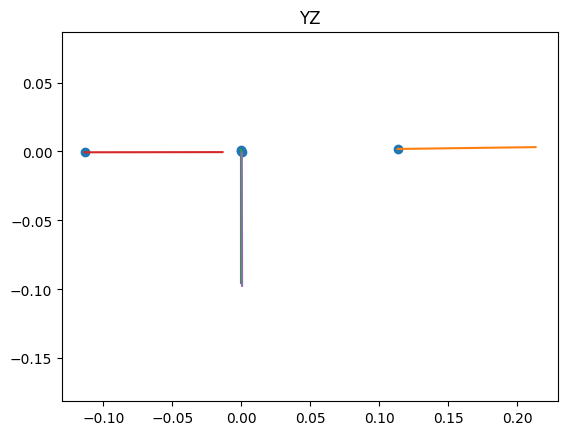

In [6]:

plot_camera_positions(Kal, orientation = True, x = True, y=True, z=True)
plot_camera_positions(Kal, orientation = True, x = True, y=True, z=False, length=0.1)
plot_camera_positions(Kal, orientation = True, x = True, y=False, z=True, length=0.1)
plot_camera_positions(Kal, orientation = True, x = False, y=True, z=True, length=0.1)

## Plotting the VLX pano positions

In [7]:
data_directory = r"K:\Projects\2025-02 Project BAEKELAND MEETHET\7.Recordings\2021-02-NAV-Populierenhof\DATA\VLX" #"C:\Data\VLX"
project_directory  = r"K:\Projects\2025-02 Project BAEKELAND MEETHET\7.Recordings\2021-02-NAV-Populierenhof\DATA\VLX"#"C:\Data\Test-Project"
mapping_sessions = ["PAV4"]#["2021-02-04_13.46.28"]

sn = SessionNode(subject="Testproject", projectPath= project_directory)

sn.tempPath = None
sn.outputPath = None

if not sn.tempPath:
    sn.projectProcessingPath = os.path.join(sn.projectPath, "PROCESSING")
else:
    sn.projectProcessingPath = sn.tempPath


path = os.path.join(data_directory,mapping_sessions[0], "pano","pano-poses.csv" )#os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "pano","pano-poses.csv" )

In [8]:
panos = []
with open(path, mode='r') as file:
    count = 0
    csvfile = csv.reader(file)
    panos = []
    for line in csvfile:
        line = line[0].split('; ')

        if not line[0].startswith("#") and count < 10:
            
            panoPath = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "pano", line[1])
            pn = ImageNode(path=panoPath)
            pn.timestamp = line[2]
            pn.pos_x = line[3]
            pn.pos_y = line[4]
            pn.pos_z = line[5]
            ori_x = float(line[7])
            ori_y = float(line[8])
            ori_z = float(line[9])
            ori_w = float(line[6])

            pn.orientation = np.array([ori_x, ori_y, ori_z, -ori_w])
            panos.append(pn)
            count += 1

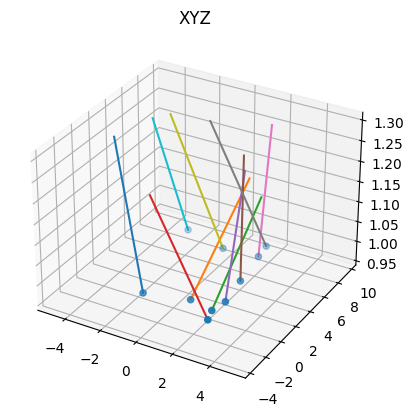

In [9]:
plot_camera_positions(panos, orientation = True, x = True, y=True, z=True, length=3)
# plot_camera_positions(panos, orientation = True, x = True, y=True, z=False, length=3)
# plot_camera_positions(panos, orientation = True, x = True, y=False, z=True, length=3)
# plot_camera_positions(panos, orientation = True, x = False, y=True, z=True, length=3)

In [10]:
def quaternion_multiply(Q0,Q1):
    """
    Multiplies two quaternions.
 
    Input
    :param Q0: A 4 element array containing the first quaternion (q01,q11,q21,q31) 
    :param Q1: A 4 element array containing the second quaternion (q02,q12,q22,q32) 
 
    Output
    :return: A 4 element array containing the final quaternion (q03,q13,q23,q33) 
 
    """
    # Extract the values from Q0
    w0 = Q0[3]
    x0 = Q0[0]
    y0 = Q0[1]
    z0 = Q0[2]
     
    # Extract the values from Q1
    w1 = Q1[3]
    x1 = Q1[0]
    y1 = Q1[1]
    z1 = Q1[2]
     
    # Computer the product of the two quaternions, term by term
    Q0Q1_w = w0 * w1 - x0 * x1 - y0 * y1 - z0 * z1
    Q0Q1_x = w0 * x1 + x0 * w1 + y0 * z1 - z0 * y1
    Q0Q1_y = w0 * y1 - x0 * z1 + y0 * w1 + z0 * x1
    Q0Q1_z = w0 * z1 + x0 * y1 - y0 * x1 + z0 * w1
     
    # Create a 4 element array containing the final quaternion
    final_quaternion = np.array([ Q0Q1_x, Q0Q1_y, Q0Q1_z,Q0Q1_w])
     
    # Return a 4 element array containing the final quaternion (q02,q12,q22,q32) 
    return final_quaternion

<Figure size 640x480 with 0 Axes>

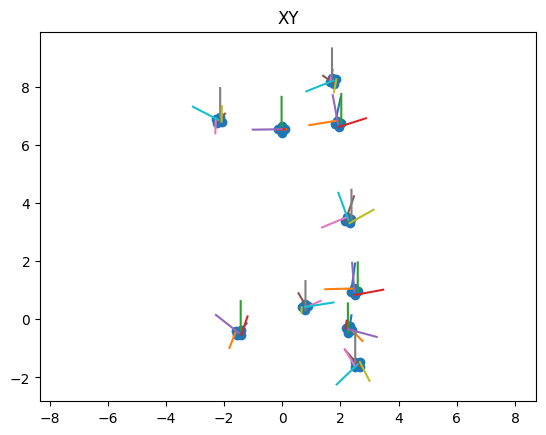

In [11]:
cams = []        
for pano in panos:
    pano_name = pano.name.split("-")[0]
    pano.linkedNodes = []
    info_name = pano_name + "-info.json"
    info_path = panoPath = os.path.join(data_directory,mapping_sessions[0], "info", info_name)#os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "info", info_name)
    
    if os.path.isfile(info_path):
        f = open(info_path)
        data = json.load(f)

        pn = ImageNode()
        pn.timestamp = data['timestamp']
        pn.pos_x = data['cam_head']['position'][0]
        pn.pos_y = data['cam_head']['position'][1]
        pn.pos_z = data['cam_head']['position'][2]
        pn.orientation = np.array([data['cam_head']["quaternion"][1], data['cam_head']["quaternion"][2], data['cam_head']["quaternion"][3],-data['cam_head']["quaternion"][0]])
        panos.append(pn)

        cam0 = ImageNode()
        cam0.name = pano_name + "-cam0.jpg"
        cam0.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
        cam0.timestamp = data['timestamp']

        cam0.pos_x = data['cam0']['position'][0]
        cam0.pos_y = data['cam0']['position'][1]
        cam0.pos_z = data['cam0']['position'][2]
        cam0.orientation = np.array([-data['cam0']['quaternion'][1], data['cam0']['quaternion'][2], data['cam0']['quaternion'][3],data['cam0']['quaternion'][0]])
        cam0.orientation = quaternion_multiply(pn.orientation,cam0.orientation)
        cams.append(cam0)
        pano.linkedNodes.append(cam0)

        cam1 = ImageNode()
        cam1.name = pano_name + "-cam1.jpg"
        cam1.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
        cam1.timestamp = data['timestamp']

        cam1.pos_x = data['cam1']['position'][0]
        cam1.pos_y = data['cam1']['position'][1]
        cam1.pos_z = data['cam1']['position'][2]
        cam1.orientation = np.array([data['cam1']['quaternion'][1], data['cam1']['quaternion'][2], data['cam1']['quaternion'][3],-data['cam1']['quaternion'][0]])
        cam1.orientation = quaternion_multiply(pn.orientation,cam1.orientation)
        cams.append(cam1)
        pano.linkedNodes.append(cam1)

        cam2 = ImageNode()
        cam2.name = pano_name + "-cam2.jpg"
        cam2.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
        cam2.timestamp = data['timestamp']

        cam2.pos_x = data['cam2']['position'][0]
        cam2.pos_y = data['cam2']['position'][1]
        cam2.pos_z = data['cam2']['position'][2]
        cam2.orientation =  np.array([data['cam2']['quaternion'][1], data['cam2']['quaternion'][2], data['cam2']['quaternion'][3],data['cam2']['quaternion'][0]])
        cam2.orientation = quaternion_multiply(pn.orientation,cam2.orientation)
        cams.append(cam2)
        pano.linkedNodes.append(cam2)

        cam3 = ImageNode()
        cam3.name = pano_name + "-cam3.jpg"
        cam3.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
        cam3.timestamp = data['timestamp']

        cam3.pos_x = data['cam3']['position'][0]
        cam3.pos_y = data['cam3']['position'][1]
        cam3.pos_z = data['cam3']['position'][2]
        cam3.orientation = np.array([data['cam3']['quaternion'][1], data['cam3']['quaternion'][2], -data['cam3']['quaternion'][3],data['cam3']['quaternion'][0]])
        cam3.orientation = quaternion_multiply(pn.orientation,cam3.orientation)
        cams.append(cam3)
        pano.linkedNodes.append(cam3)
        cams.append(pano)
 
        f.close()
plot_camera_positions(cams, orientation = True, x = True, y=True, z=False)


<Figure size 640x480 with 0 Axes>

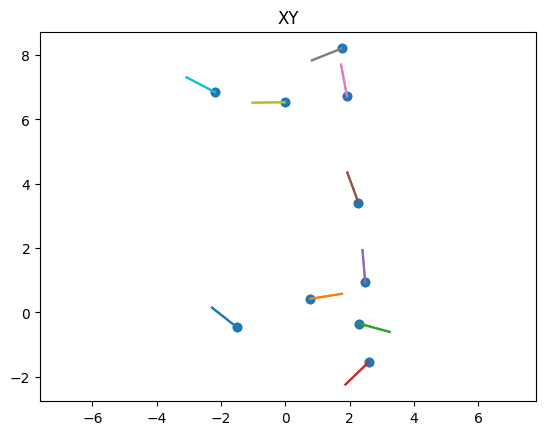

In [12]:
plot_camera_positions(panos, orientation = True, x = True, y=True, z=False)